In [0]:
import tensorflow as tf

In [0]:
from tensorflow.examples.tutorials.mnist import input_data

In [39]:
mnist = input_data.read_data_sets(".",one_hot=True)

Extracting ./train-images-idx3-ubyte.gz
Extracting ./train-labels-idx1-ubyte.gz
Extracting ./t10k-images-idx3-ubyte.gz
Extracting ./t10k-labels-idx1-ubyte.gz


In [0]:
#HELPER
#init weights


In [0]:
def init_weights(shape):
    init_random_dist=tf.truncated_normal(shape,stddev=0.1)
    return tf.Variable(init_random_dist)

In [0]:
#init bias

def init_bias(shape):
    init_bias_vals=tf.constant(0.1,shape=shape)
    return tf.Variable(init_bias_vals)

In [0]:
#conv2d
def conv2d(x,W):
    #x->input tensor [batch,ht,width,no.ofchannels]
    #W-> [filter ht,filter widht,no.ofchannel_in,k_out]
    
    return tf.nn.conv2d(x,W,strides=[1,1,1,1],padding='SAME')

In [0]:
#maxpooling

def max_pool_2by2(x):
    return tf.nn.max_pool(x,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')



In [0]:
#convolutional layer
def conv_layer(input_x,shape):
    W=init_weights(shape)
    b=init_bias([shape[3]])
    return tf.nn.relu(conv2d(input_x,W)+b)

In [0]:
#fully connected
def norm_full_layer(input_layer,size):
    input_size=int(input_layer.get_shape()[1])
    W=init_weights([input_size,size])
    b=init_bias([size])
    return tf.matmul(input_layer,W)+b

In [0]:
#placeholder
x=tf.placeholder(tf.float32,shape=[None,784])

In [0]:
y_true=tf.placeholder(tf.float32,shape=[None,10])


In [0]:
#LAYERS
#to reshape to 28*28
x_image=tf.reshape(x,[-1,28,28,1])

In [0]:
convo_1=conv_layer(x_image,shape=[5,5,1,32])
convo_1_pooling=max_pool_2by2(convo_1)

In [0]:
convo_2=conv_layer(convo_1_pooling,shape=[5,5,32,64])
convo_2_pooling=max_pool_2by2(convo_2)

In [0]:
convo_2_flat=tf.reshape(convo_2_pooling,[-1,7*7*64])
#1024n no of neurons
full_layer_one=tf.nn.relu(norm_full_layer(convo_2_flat,1024))


In [0]:
#droput
hold_prob=tf.placeholder(tf.float32)
full_one_dropout=tf.nn.dropout(full_layer_one,keep_prob=hold_prob)

In [0]:
y_pred=norm_full_layer(full_one_dropout,10)
#10 labels

In [0]:
#creating a loss function 
cross_entropy=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true,logits=y_pred))

In [0]:
#optimizer
optimizer = tf.train.AdamOptimizer(learning_rate=0.001)
train = optimizer.minimize(cross_entropy)

In [0]:
init=tf.global_variables_initializer()


In [0]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

In [0]:
frame=cv2.imread("3.jpg")
frame=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
#plt.imshow(frame)

Saving 25.jpg to 25.jpg


{'25.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00`\x00`\x00\x00\xff\xe1\x01\x0cExif\x00\x00MM\x00*\x00\x00\x00\x08\x00\x01\x87i\x00\x04\x00\x00\x00\x01\x00\x00\x00\x16\x00\x01\x92\x86\x00\x07\x00\x00\x00\xe0\x00\x00\x00$UNICODE\x00\x00I\x00m\x00a\x00g\x00e\x00 \x00l\x00i\x00c\x00e\x00n\x00s\x00e\x00d\x00 \x00t\x00o\x00 \x00Z\x00a\x00z\x00z\x00l\x00e\x00 \x00I\x00n\x00c\x00.\x00 \x00A\x00l\x00l\x00 \x00u\x00n\x00a\x00u\x00t\x00h\x00o\x00r\x00i\x00z\x00e\x00d\x00 \x00u\x00s\x00e\x00 \x00i\x00s\x00 \x00p\x00r\x00o\x00h\x00i\x00b\x00i\x00t\x00e\x00d\x00.\x00 \x005\x00b\x009\x003\x005\x009\x00b\x00a\x00-\x00e\x00d\x006\x00f\x00-\x004\x00a\x000\x008\x00-\x009\x008\x003\x00b\x00-\x003\x009\x007\x00d\x00d\x001\x006\x009\x003\x00d\x00b\x003\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xff\xdb\x00C\x00\x04\x03\x03\x04\x03\x03\x04\x04\x03\x04\x05\x04\x04\x05\x06\n\x07\x06\x06\x06\x06\r\t\n\x08\n\x0f\r\x10\x10\x0f\r\x0f\x0e\x11\x13\x18\x14\x11\x12\x17\x12\x0e\x0f\x15\x1c\x15\x17\x19

In [181]:
print(frame.shape)     


(1000, 1000)


In [0]:
cv2.destroyAllWindows()

In [0]:

reimage=cv2.resize(frame ,(28,28),interpolation =cv2.INTER_AREA)


In [184]:
print(reimage)
#reimage=reimage/255


[[255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 214 142  91  62  57  75 117 188 253
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255  71  34  36  41  47  53  57  62 114
  242 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255  73  37  43  57  55  54  57  60  65
  119 253 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 127 176 235 253 249 199  91  59  64
   70 190 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 242  84  63
   68 125 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 25

In [185]:
reimage.shape

(28, 28)

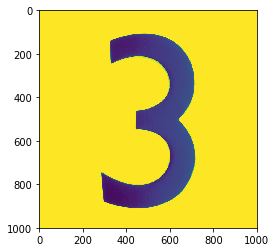

In [186]:
plt.imshow(frame)

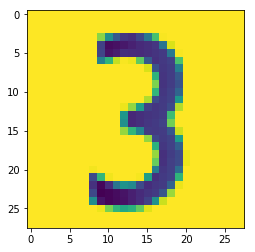

In [187]:

plt.imshow(reimage)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.35686275
  0.2431372

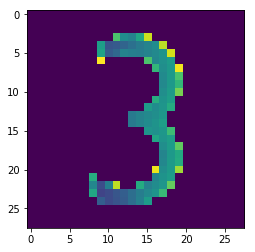

In [188]:
ret,f=cv2.threshold(reimage,127,255,cv2.THRESH_TOZERO_INV)
plt.imshow(f)
print(f/255)
f=f/255

In [0]:
a=np.array([0,1,0,0,0,0,0,0,0,0])


In [190]:




steps = 2000
with tf.Session() as sess:
  sess.run(init)
  
  for i in range(steps):
    batch_x,batch_y=mnist.train.next_batch(50)
    sess.run(train,feed_dict={x:batch_x,y_true:batch_y,hold_prob:0.5})
    
    if i%100==0:
      print("on step{}:".format(i))
      print("accuracy:")
      
      #matches=tf.equal(tf.argmax(y_pred,1),tf.argmax(y_true,1))
      
      #acc = tf.reduce_mean(tf.cast(matches,tf.float32))
      
      print(sess.run(y_pred,feed_dict={x:f.reshape(1,784),y_true:a.reshape(1,10),hold_prob:1.0}))
      print('\n')
      

on step0:
accuracy:
[[  2.750034     3.4385037  -14.957839     1.0336332   -2.5952058
   -0.6364917    3.6161869   -0.31542143  -0.29800272  -0.04138096]]


on step100:
accuracy:
[[-1.2410607   0.6423417  -0.1673229   1.547751    0.60142606  0.15781587
  -0.99327946 -0.30714288 -0.28908783 -0.74941117]]


on step200:
accuracy:
[[-0.98127025  0.22212616  0.2954908   1.9209142  -0.46928722  0.43417513
  -0.81819314 -0.47165394 -0.6305659  -0.73018134]]


on step300:
accuracy:
[[-0.8466727   0.13401671  0.14695248  2.225039   -0.55586755  0.1328227
  -1.3304377  -0.45941776 -0.11020415 -0.24528898]]


on step400:
accuracy:
[[-1.1225855  -0.12523594  0.761097    3.374997   -1.1604581   0.065633
  -1.4237916  -0.35893854 -0.30227512 -0.6709863 ]]


on step500:
accuracy:
[[-1.4718745  -0.79486334  0.9410502   2.1286104  -0.6976845   0.3915451
  -1.1040787  -0.92446136  0.31737173 -0.46654826]]


on step600:
accuracy:
[[-1.3710574  -0.21439359  0.8265944   2.1254032  -0.40736496  0.4728772
  